In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import math
from keras.layers import Dense, LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

C:\Users\Omkar Singh\AppData\Local\Temp\ipykernel_9896\922827735.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
stock=yf.download("TATASTEEL.NS",period="5y",actions=True)
stock

c:\Program Files\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2019-02-22,49.700001,50.400002,49.209999,50.230000,42.880379,100057230,0.0,0.0
2019-02-25,50.400002,50.950001,49.825001,50.509998,43.119411,103576040,0.0,0.0
2019-02-26,49.799999,50.860001,49.169998,50.360001,42.991356,98562990,0.0,0.0
2019-02-27,50.700001,51.230000,49.794998,50.709999,43.290146,94443460,0.0,0.0
2019-02-28,50.660000,51.099998,49.830002,50.044998,42.722446,74854180,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-02-16,142.050003,143.449997,141.500000,142.300003,142.300003,22316127,0.0,0.0
2024-02-19,142.949997,143.350006,141.350006,141.949997,141.949997,16973568,0.0,0.0
2024-02-20,141.949997,142.250000,140.050003,141.050003,141.050003,24291123,0.0,0.0


<Axes: xlabel='Date', ylabel='Close'>

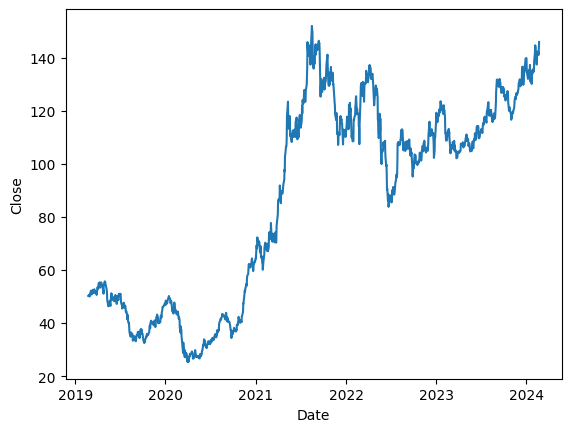

In [3]:
sns.lineplot(data=stock,x="Date",y="Close")

In [4]:
data=stock.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*0.75)
training_data_len

927

In [5]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.1963813 ],
       [0.19859359],
       [0.19740845],
       ...,
       [0.91395726],
       [0.93647526],
       [0.95227742]])

In [6]:
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    
    

In [7]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(867, 60, 1)

In [8]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [9]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [10]:
model.fit(x_train,y_train,epochs=10,batch_size=1)

Epoch 1/10
867/867 [==============================] - 15s 14ms/step - loss: 0.0033
Epoch 2/10
867/867 [==============================] - 11s 13ms/step - loss: 0.0019
Epoch 3/10
867/867 [==============================] - 11s 12ms/step - loss: 0.0011
Epoch 4/10
867/867 [==============================] - 11s 13ms/step - loss: 9.0412e-04
Epoch 5/10
867/867 [==============================] - 12s 14ms/step - loss: 7.1516e-04
Epoch 6/10
867/867 [==============================] - 12s 14ms/step - loss: 6.6430e-04
Epoch 7/10
867/867 [==============================] - 12s 13ms/step - loss: 6.9389e-04
Epoch 8/10
867/867 [==============================] - 11s 13ms/step - loss: 7.1499e-04
Epoch 9/10
867/867 [==============================] - 11s 13ms/step - loss: 7.4763e-04
Epoch 10/10
867/867 [==============================] - 11s 13ms/step - loss: 5.7428e-04


In [11]:
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [12]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [13]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


10/10 [==============================] - 1s 7ms/step


In [14]:
rmse= np.sqrt(((predictions - y_test) ** 2).mean())
rmse

4.3664253188443825

In [15]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions


C:\Users\Omkar Singh\AppData\Local\Temp\ipykernel_9896\1407704556.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


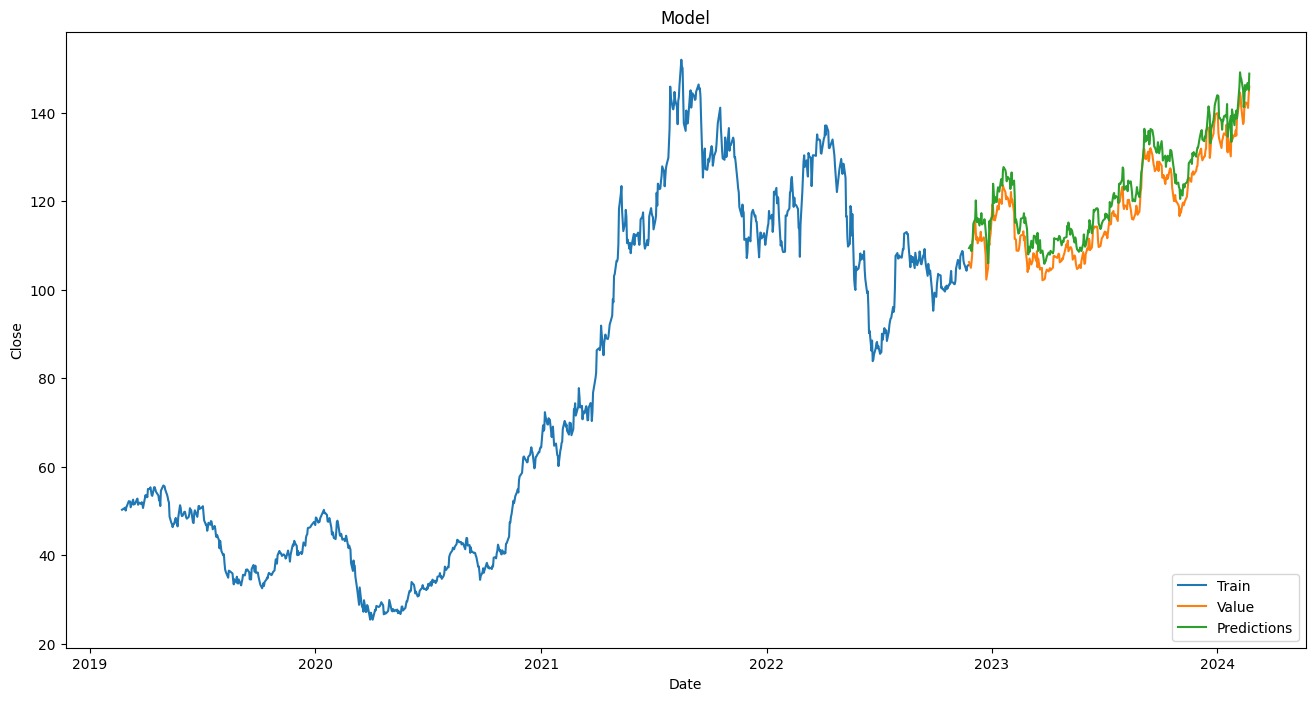

In [16]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Value','Predictions'], loc='lower right')
plt.show()

In [17]:
valid

,Close,Predictions
Date,,
2022-11-25,106.199997,109.357674
2022-11-28,104.900002,110.098984
2022-11-29,106.099998,108.668411
2022-11-30,107.650002,110.079323
2022-12-01,110.750000,111.627556
...,...,...
2024-02-16,142.300003,145.014633
2024-02-19,141.949997,146.659073
2024-02-20,141.050003,145.795258


quote=yf.download("TCS.BO",period=)
new_df=quote.filter(['Close'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test.shape[0],(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)